# Assignment 1

**Name:** Wendy Stefany Escamilla Valadez

**e-mail:** wendy.escamilla@cucei.udg.mx

# MODULES

In [165]:
# Load modules

import numpy as np
import scipy.stats as stats
import plotly.graph_objs as go
import math 
import matplotlib.pyplot as plt

from scipy.stats import levy_stable
from scipy.stats import levy


import pandas as pd
import random


____________________________________

# Correlated Random Walk - 1 Trajectory 

- Select rotations from a Cauchy distribution (scipy).
- Implement usign Vec2d class.
- Keep trajectory in a numpy array
- Visualize trajectory using plotly - 2D projection

## Class Vec2d

2d vector class, supports vector and scalar operators, and also provides a bunch of high level functions

In [166]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:            
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y
            
    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)
    
    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)
    
    # rotate vector
    def rotated(self, angle):        
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

## Initial parameters

In [167]:
# Init parameters
n_steps = 10000
s_pos = 0 
speed = 6

# init velocity vector
velocity = Vec2d(speed,0)

# Matrix for the Random Walk
RW = np.ones(shape=(n_steps,2)) * s_pos

## Generate rotations from a **Cauchy**

In [168]:
cauchy_distribution = stats.cauchy()
rotations = cauchy_distribution.rvs(size=n_steps)  # Generate 100 angles for rotation

## Start Random Walk

In [169]:

for i in range(1, n_steps):

    rotation_angle = rotations[i]

    # We are rotating the velocity vector
    velocity = velocity.rotated(rotation_angle)

    #Updateto new position
    RW[i,0] = RW[i-1,0] + velocity.x
    RW[i,1] = RW[i-1,1] + velocity.y



In [170]:
# Plot 
fig = go.Figure()

fig.add_trace(go.Scatter(x=RW[:,0], y=RW[:,1], mode='lines'))

fig.update_layout(
    title="Correlated Random Walk - 2D Projection",
    xaxis_title="X",
    yaxis_title="Y",
    showlegend=False
)

fig.show()


___________________________________________________________________________

# Lévy distribution - N different curves

- Plot at least the 4 different curves shown in the figure using plotly.
- Each one of the curves corresponds to a different alpha value.
- Consider the following parameters: m = 3.0, beta = 0.

## Initial parameters

In [171]:
# Init variables
m = 3.0
beta = 0.0
alphas_random = np.random.uniform(0.5, 2.5, 5)  # Random values for alpha between 0.5 and 2.5
alphas = np.round(alphas_random, 1) 

## Start Lévy distribution

In [172]:
# Range X
x = np.linspace(-2, 8, 600)

curvas = []
for alpha in alphas:

    # PDF Levy
    rv = stats.levy_stable(alpha, beta, loc=m)
    y = rv.pdf(x)
    
    # Add trazo
    trazo = go.Scatter(x=x, y=y, mode='lines', name=f'alpha = {alpha}')
    curvas.append(trazo)

In [173]:
# Plot
layout = go.Layout(
    title='Lévy distribution - N different curves',
    xaxis=dict(title='x'),
    yaxis=dict(title='y'),
    showlegend=True
)

fig = go.Figure(data=curvas, layout=layout)
fig.show()


___________________________________________________________________

# Lévy distribution - Histograma + Curve

- From a set of random values drawn from a Lévy stable distribution, obtain its histogram
and compare it to the corresponding PDF curve.
- Visualize using matplotlib.

## Initial parameters

In [174]:
# Init variables
m = 3.0
beta = 0
alpha = 1.5
size = 4800


## Start Lévy distribution - Histograma

In [175]:
# Range X
x = np.linspace(-2, 8, size)


# PDF Lévy
y = levy_stable.pdf(x, alpha, beta, loc=m)

# Generate random values from the Lévy stable distribution
r = levy_stable.rvs(alpha, beta, size=size, loc=m)


# Plot

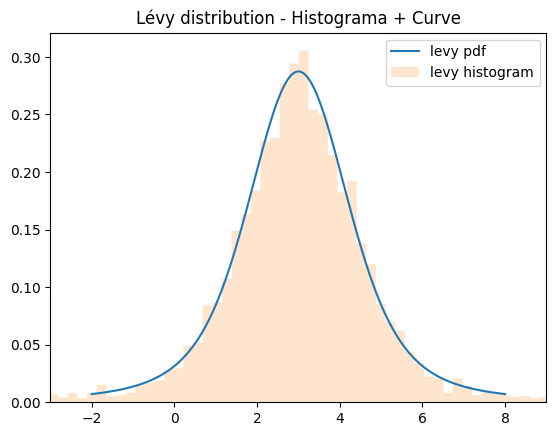

In [176]:
# Create plot
fig, ax = plt.subplots(1,1)

#  Curve Lévy
plt.plot(x, y, label='levy pdf')
plt.title('Lévy distribution - Histograma + Curve')

# Create a histogram
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2, label='levy histogram')
# limit histograma
ax.set_xlim([x[0]-1, x[-1]+1])
ax.legend(loc='best')

#Show histogram + curve
plt.show()

____________________________________________________

# Lévy flight - Vec2d - 1 Trajecotry

- Generate a Lévy flight trajectory.
- Implement usign Vec2d class.
- Keep the trajectory in a pandas Data Frame.
- Visualize trajectory using plotly - 3D projection

## Initial parameters

In [177]:
# Init variables
n_steps = 1000
alpha = 1.5
beta = 0
time_per_step = 0.0004
initial_position = Vec2d(0, 0)
initial_velocity = Vec2d(1, 0)
z_pos = 0

## Start Lévy flight - Vec2d - 1 Trajecotry

In [178]:
# Generate steps size using Levy
r = levy_stable.rvs(alpha, beta, loc=0, size=n_steps)

# Start trajectory
trajectory = [{'x_pos': initial_position.x, 'y_pos': initial_position.y, 'z_pos': z_pos}]
position = initial_position
velocity = initial_velocity

# Genetare trajectory
for i in range(n_steps):
    step_size = r[i]  
    velocity = velocity.rotated(step_size)  # Rotating the velocity vector
    length_traveled = velocity.get_length() * step_size * time_per_step  # Calculate the distance traveled

    # New position
    position = position + Vec2d(velocity.x * step_size, velocity.y * step_size)
    z_pos += length_traveled

    # Store new position
    trajectory.append({'x_pos': position.x, 'y_pos': position.y, 'z_pos': z_pos})

# Change list to DataFrame
trajectory_df = pd.DataFrame(trajectory)

In [179]:
# Plt
fig = go.Figure()

fig.add_trace(
    go.Scatter3d(
        x=trajectory_df['x_pos'], 
        y=trajectory_df['y_pos'], 
        z=trajectory_df['z_pos'], 
        mode='lines', 
        showlegend=True, 
        name='Levy Flight in 3D'
    )
)

fig.update_layout(
    title="Lévy flight - Vec2d - 1 Trajecotry",
    width=900,
    height=800,
    showlegend=True
)

fig.show()

-----------------------------------------------------------------

# Correlated Random Walk - Vec2d - N Trajectories

- Generate as many CRW trajectories as specified on a control variable n_traj.
- Each of the trajectories should be generated using a unique Cauchy coefficient.
- Implement usign Vec2d class.
- Keep the trajectories in a Pandas Data Frame.
- Visualize trajectories using plotly - 3D projection